In [245]:
import pandas as pd
import numpy as np
import itertools

In [246]:
pd.set_option('display.max_columns', None)

In [247]:
df = pd.read_csv('deadlock_matches_raw_17k.csv')
df

,matchid,duration,winner,hero_1_A,nickname_1_A,lane_1_A,kills_1_A,deaths_1_A,assists_1_A,souls_1_A,SPM_1_A,last_hits_1_A,denies_1_A,level_1_A,hero_2_A,nickname_2_A,lane_2_A,kills_2_A,deaths_2_A,assists_2_A,souls_2_A,SPM_2_A,last_hits_2_A,denies_2_A,level_2_A,hero_3_A,nickname_3_A,lane_3_A,kills_3_A,deaths_3_A,assists_3_A,souls_3_A,SPM_3_A,last_hits_3_A,denies_3_A,level_3_A,hero_4_A,nickname_4_A,lane_4_A,kills_4_A,deaths_4_A,assists_4_A,souls_4_A,SPM_4_A,last_hits_4_A,denies_4_A,level_4_A,hero_5_A,nickname_5_A,lane_5_A,kills_5_A,deaths_5_A,assists_5_A,souls_5_A,SPM_5_A,last_hits_5_A,denies_5_A,level_5_A,hero_6_A,nickname_6_A,lane_6_A,kills_6_A,deaths_6_A,assists_6_A,souls_6_A,SPM_6_A,last_hits_6_A,denies_6_A,level_6_A,hero_1_B,nickname_1_B,lane_1_B,kills_1_B,deaths_1_B,assists_1_B,souls_1_B,SPM_1_B,last_hits_1_B,denies_1_B,level_1_B,hero_2_B,nickname_2_B,lane_2_B,kills_2_B,deaths_2_B,assists_2_B,souls_2_B,SPM_2_B,last_hits_2_B,denies_2_B,level_2_B,hero_3_B,nickname_3_B,lane_3_B,kills_3_B,deaths_3_B,assists_3_B,souls_3_B,SPM_3_B,last_hits_3_B,denies_3_B,level_3_B,hero_4_B,nickname_4_B,lane_4_B,kills_4_B,deaths_4_B,assists_4_B,souls_4_B,SPM_4_B,last_hits_4_B,denies_4_B,level_4_B,hero_5_B,nickname_5_B,lane_5_B,kills_5_B,deaths_5_B,assists_5_B,souls_5_B,SPM_5_B,last_hits_5_B,denies_5_B,level_5_B,hero_6_B,nickname_6_B,lane_6_B,kills_6_B,deaths_6_B,assists_6_B,souls_6_B,SPM_6_B,last_hits_6_B,denies_6_B,level_6_B
0,6300004,34:10,The Amber Hand,Haze,W0mblez,Left,25,4,15,50513,1478.43,221,9,33,McGinnis,Shelby,Mid Right,5,10,10,31776,930.03,143,5,27,Lash,Tigs,Right,7,8,11,28285,827.85,113,9,26,Bebop,Slytherin,Right,6,0,10,33543,981.75,117,6,28,Wraith,1199450851,Right,12,8,8,28878,845.21,78,4,26,Lady Geist,90350333,Right,8,8,17,28422,831.86,91,6,26,Seven,257383416,Left,4,10,9,29975,877.32,188,3,26,Vindicta,1100001672,Mid Right,13,6,4,38337,1122.06,194,10,29,Grey Talon,Wildfire,Right,9,8,7,26820,784.98,89,10,25,Infernus,317422644,Right,0,11,3,17163,502.33,65,1,21,Pocket,111708135,Right,8,17,12,26499,775.58,79,2,25,Warden,300251938,Right,4,11,13,22758,666.09,80,1,24
1,6300005,15:24,The Sapphire Flame,Yamato,403129367,Left,0,4,1,4768,309.61,41,1,9,Kelvin,19383962,Mid Right,0,4,1,6659,432.40,49,7,11,Vindicta,83615446,Right,0,5,2,7644,496.36,55,0,12,Infernus,BobaMut,Right,0,9,0,5568,361.56,33,0,10,Shiv,64077263,Right,0,8,1,7489,486.30,57,0,11,Bebop,russer,Right,2,8,0,7199,467.47,28,3,11,Seven,Biggins,Left,4,2,6,15577,1011.49,93,14,20,Wraith,Tylo,Mid Right,3,0,2,17468,1134.29,111,10,21,Pocket,82241653,Right,6,1,8,15605,1013.31,41,10,20,Mo & Krill,Fishies,Right,4,0,8,18300,1188.31,87,7,22,Abrams,154281462,Right,8,0,6,15679,1018.12,42,2,20,Paradox,51001999,Right,13,0,6,18962,1231.30,79,10,22
2,6300007,25:17,The Amber Hand,Lady Geist,сельский,Left,15,4,8,26126,1033.33,95,4,25,Kelvin,316656616,Left,2,2,12,19294,763.11,50,1,22,Infernus,𖤐,Mid Right,6,0,8,24483,968.35,124,13,25,Pocket,1143261516,Right,9,1,12,25315,1001.25,121,10,25,Warden,CrumpetFucknuts,Right,5,0,9,20886,826.08,52,4,23,Haze,491078215,Right,11,1,6,24356,963.32,96,10,25,Paradox,752863044,Left,4,7,2,16834,665.81,63,5,21,Ivy,M4RTY McFLy,Left,2,8,4,15497,612.93,94,5,20,Seven,861499792,Mid Right,0,12,1,11559,457.18,78,1,16,Viscous,ZertherSF,Right,0,6,0,12745,504.09,93,1,17,Abrams,1477908105,Right,1,10,1,12601,498.39,44,9,17,Shiv,129238282,Right,0,5,3,12998,514.09,64,11,17
3,6300008,20:29,The Sapphire Flame,Warden,loira.sol,Left,7,6,0,22709,1108.66,111,2,24,Abrams,906843987,Left,1,5,0,10029,489.62,32,1,15,Dynamo,66634537,Mid Right,0,8,2,12222,596.68,46,4,17,Haze,7057478,Right,2,11,2,14053,686.07,47,1,19,Viscous,Taktik021,Right,3,10,4,16099,785.96,92,2,21,Shiv,Domosh,Right,2,8,2,11677,570.07,24,0,16,Bebop,84205330,Left,9,3,7,18192,888.14,62,0,21,McGinnis,SDENG SDENG SDENG SDENG SDENG,Left,4,1,13,19268,940.67,84,10,22,Grey Talon,32889724,Mid Right,13,3,12,19987,975.77,77,0,22,Vindicta,217769087,Right,11,4,2,21413,1045.39,94,1,23,Wraith,мех,Right,6,2,4,23925,1168.02,115,7,24,Seven,96893110,Rig

In [248]:
df.isna().sum()

matchid          0
duration         0
winner           0
hero_1_A         0
nickname_1_A     0
                ..
souls_6_B        0
SPM_6_B          0
last_hits_6_B    0
denies_6_B       0
level_6_B        0
Length: 135, dtype: int64

In [249]:
df.duplicated().sum()

0

In [250]:
df['winner'] = df['winner'].apply(lambda x: 0 if x == 'The Amber Hand' else 1)
df

,matchid,duration,winner,hero_1_A,nickname_1_A,lane_1_A,kills_1_A,deaths_1_A,assists_1_A,souls_1_A,SPM_1_A,last_hits_1_A,denies_1_A,level_1_A,hero_2_A,nickname_2_A,lane_2_A,kills_2_A,deaths_2_A,assists_2_A,souls_2_A,SPM_2_A,last_hits_2_A,denies_2_A,level_2_A,hero_3_A,nickname_3_A,lane_3_A,kills_3_A,deaths_3_A,assists_3_A,souls_3_A,SPM_3_A,last_hits_3_A,denies_3_A,level_3_A,hero_4_A,nickname_4_A,lane_4_A,kills_4_A,deaths_4_A,assists_4_A,souls_4_A,SPM_4_A,last_hits_4_A,denies_4_A,level_4_A,hero_5_A,nickname_5_A,lane_5_A,kills_5_A,deaths_5_A,assists_5_A,souls_5_A,SPM_5_A,last_hits_5_A,denies_5_A,level_5_A,hero_6_A,nickname_6_A,lane_6_A,kills_6_A,deaths_6_A,assists_6_A,souls_6_A,SPM_6_A,last_hits_6_A,denies_6_A,level_6_A,hero_1_B,nickname_1_B,lane_1_B,kills_1_B,deaths_1_B,assists_1_B,souls_1_B,SPM_1_B,last_hits_1_B,denies_1_B,level_1_B,hero_2_B,nickname_2_B,lane_2_B,kills_2_B,deaths_2_B,assists_2_B,souls_2_B,SPM_2_B,last_hits_2_B,denies_2_B,level_2_B,hero_3_B,nickname_3_B,lane_3_B,kills_3_B,deaths_3_B,assists_3_B,souls_3_B,SPM_3_B,last_hits_3_B,denies_3_B,level_3_B,hero_4_B,nickname_4_B,lane_4_B,kills_4_B,deaths_4_B,assists_4_B,souls_4_B,SPM_4_B,last_hits_4_B,denies_4_B,level_4_B,hero_5_B,nickname_5_B,lane_5_B,kills_5_B,deaths_5_B,assists_5_B,souls_5_B,SPM_5_B,last_hits_5_B,denies_5_B,level_5_B,hero_6_B,nickname_6_B,lane_6_B,kills_6_B,deaths_6_B,assists_6_B,souls_6_B,SPM_6_B,last_hits_6_B,denies_6_B,level_6_B
0,6300004,34:10,0,Haze,W0mblez,Left,25,4,15,50513,1478.43,221,9,33,McGinnis,Shelby,Mid Right,5,10,10,31776,930.03,143,5,27,Lash,Tigs,Right,7,8,11,28285,827.85,113,9,26,Bebop,Slytherin,Right,6,0,10,33543,981.75,117,6,28,Wraith,1199450851,Right,12,8,8,28878,845.21,78,4,26,Lady Geist,90350333,Right,8,8,17,28422,831.86,91,6,26,Seven,257383416,Left,4,10,9,29975,877.32,188,3,26,Vindicta,1100001672,Mid Right,13,6,4,38337,1122.06,194,10,29,Grey Talon,Wildfire,Right,9,8,7,26820,784.98,89,10,25,Infernus,317422644,Right,0,11,3,17163,502.33,65,1,21,Pocket,111708135,Right,8,17,12,26499,775.58,79,2,25,Warden,300251938,Right,4,11,13,22758,666.09,80,1,24
1,6300005,15:24,1,Yamato,403129367,Left,0,4,1,4768,309.61,41,1,9,Kelvin,19383962,Mid Right,0,4,1,6659,432.40,49,7,11,Vindicta,83615446,Right,0,5,2,7644,496.36,55,0,12,Infernus,BobaMut,Right,0,9,0,5568,361.56,33,0,10,Shiv,64077263,Right,0,8,1,7489,486.30,57,0,11,Bebop,russer,Right,2,8,0,7199,467.47,28,3,11,Seven,Biggins,Left,4,2,6,15577,1011.49,93,14,20,Wraith,Tylo,Mid Right,3,0,2,17468,1134.29,111,10,21,Pocket,82241653,Right,6,1,8,15605,1013.31,41,10,20,Mo & Krill,Fishies,Right,4,0,8,18300,1188.31,87,7,22,Abrams,154281462,Right,8,0,6,15679,1018.12,42,2,20,Paradox,51001999,Right,13,0,6,18962,1231.30,79,10,22
2,6300007,25:17,0,Lady Geist,сельский,Left,15,4,8,26126,1033.33,95,4,25,Kelvin,316656616,Left,2,2,12,19294,763.11,50,1,22,Infernus,𖤐,Mid Right,6,0,8,24483,968.35,124,13,25,Pocket,1143261516,Right,9,1,12,25315,1001.25,121,10,25,Warden,CrumpetFucknuts,Right,5,0,9,20886,826.08,52,4,23,Haze,491078215,Right,11,1,6,24356,963.32,96,10,25,Paradox,752863044,Left,4,7,2,16834,665.81,63,5,21,Ivy,M4RTY McFLy,Left,2,8,4,15497,612.93,94,5,20,Seven,861499792,Mid Right,0,12,1,11559,457.18,78,1,16,Viscous,ZertherSF,Right,0,6,0,12745,504.09,93,1,17,Abrams,1477908105,Right,1,10,1,12601,498.39,44,9,17,Shiv,129238282,Right,0,5,3,12998,514.09,64,11,17
3,6300008,20:29,1,Warden,loira.sol,Left,7,6,0,22709,1108.66,111,2,24,Abrams,906843987,Left,1,5,0,10029,489.62,32,1,15,Dynamo,66634537,Mid Right,0,8,2,12222,596.68,46,4,17,Haze,7057478,Right,2,11,2,14053,686.07,47,1,19,Viscous,Taktik021,Right,3,10,4,16099,785.96,92,2,21,Shiv,Domosh,Right,2,8,2,11677,570.07,24,0,16,Bebop,84205330,Left,9,3,7,18192,888.14,62,0,21,McGinnis,SDENG SDENG SDENG SDENG SDENG,Left,4,1,13,19268,940.67,84,10,22,Grey Talon,32889724,Mid Right,13,3,12,19987,975.77,77,0,22,Vindicta,217769087,Right,11,4,2,21413,1045.39,94,1,23,Wraith,мех,Right,6,2,4,23925,1168.02,115,7,24,Seven,96893110,Right,5,2,10,17626,860.50,54,5,21
4,6300009,29:35,1,Ivy,2990226

In [251]:
# df['A_kills'] = 0
# df['B_kills'] = 0
# df['A_deaths'] = 0
# df['B_deaths'] = 0
# df['A_assists'] = 0
# df['B_assists'] = 0
# df['A_souls'] = 0
# df['B_souls'] = 0

for ch in ('A', 'B'):
    for i in range(1, 7):
        # df[f'{ch}_kills'] += df[f'kills_{i}_{ch}']
        # df[f'{ch}_deaths'] += df[f'deaths_{i}_{ch}']
        # df[f'{ch}_assists'] += df[f'assists_{i}_{ch}']
        # df[f'{ch}_souls'] += df[f'souls_{i}_{ch}']

        df.drop(f'nickname_{i}_{ch}', axis=1, inplace=True)
        df.drop(f'lane_{i}_{ch}', axis=1, inplace=True)
        df.drop(f'kills_{i}_{ch}', axis=1, inplace=True)
        df.drop(f'deaths_{i}_{ch}', axis=1, inplace=True)
        df.drop(f'assists_{i}_{ch}', axis=1, inplace=True)
        df.drop(f'souls_{i}_{ch}', axis=1, inplace=True)
        df.drop(f'SPM_{i}_{ch}', axis=1, inplace=True)
        df.drop(f'last_hits_{i}_{ch}', axis=1, inplace=True)
        df.drop(f'denies_{i}_{ch}', axis=1, inplace=True)
        df.drop(f'level_{i}_{ch}', axis=1, inplace=True)
    
    # df[f'{ch}_deaths'] = df[f'{ch}_deaths'].apply(lambda x: 1 if x == 0 else x)
    # df[f'{ch}_KDA'] = (df[f'{ch}_kills'] + df[f'{ch}_assists']) / df[f'{ch}_deaths']
    # df.drop(f'{ch}_kills', axis=1, inplace=True)
    # df.drop(f'{ch}_deaths', axis=1, inplace=True)
    # df.drop(f'{ch}_assists', axis=1, inplace=True)
for ch in ('A', 'B'):
    for i in range(1, 7):
        df[f'hero_{i}_{ch}'] = df[f'hero_{i}_{ch}'].str.lower()
df

,matchid,duration,winner,hero_1_A,hero_2_A,hero_3_A,hero_4_A,hero_5_A,hero_6_A,hero_1_B,hero_2_B,hero_3_B,hero_4_B,hero_5_B,hero_6_B
0,6300004,34:10,0,haze,mcginnis,lash,bebop,wraith,lady geist,seven,vindicta,grey talon,infernus,pocket,warden
1,6300005,15:24,1,yamato,kelvin,vindicta,infernus,shiv,bebop,seven,wraith,pocket,mo & krill,abrams,paradox
2,6300007,25:17,0,lady geist,kelvin,infernus,pocket,warden,haze,paradox,ivy,seven,viscous,abrams,shiv
3,6300008,20:29,1,warden,abrams,dynamo,haze,viscous,shiv,bebop,mcginnis,grey talon,vindicta,wraith,seven
4,6300009,29:35,1,ivy,kelvin,grey talon,mo & krill,pocket,wraith,viscous,shiv,vindicta,haze,seven,infernus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17859,6430057,24:01,1,viscous,pocket,haze,infernus,vindicta,yamato,bebop,paradox,wraith,kelvin,seven,warden
17860,6430059,18:16,1,dynamo,viscous,kelvin,warden,bebop,mo & krill,haze,paradox,mcginnis,ivy,vindicta,abrams
17861,6430060,26:55,0,dynamo,bebop,seven,haze,viscous,mcginnis,vindicta,infernus,warden,lady geist,shiv,grey talon
17862,6430061,44:21,0,pocket,infernus,wraith,haze,seven,bebop,lady geist,mo & krill,mcginnis,warden,yamato,vindicta


In [279]:
# df.to_csv('picks_only_17k.csv', index=False)
df = pd.read_csv('picks_only.csv')
df_example = df

In [253]:
heroes = ['abrams', 'bebop', 'dynamo', 'grey talon', 'haze', 'infernus', 'ivy', 'kelvin', 'lady geist','lash', 'mcginnis',
                                  'mo & krill', 'paradox', 'pocket', 'seven', 'shiv', 'vindicta', 'viscous', 'warden', 'wraith', 'yamato']
duo_winrate = {}
for i in itertools.combinations(heroes, 2):
    duo_winrate[i] = {'win': 0, 'total': 0}

In [254]:
df['A'] = df[['hero_1_A', 'hero_2_A', 'hero_3_A', 'hero_4_A', 'hero_5_A', 'hero_6_A']].values.tolist()
df['B'] = df[['hero_1_B', 'hero_2_B', 'hero_3_B', 'hero_4_B', 'hero_5_B', 'hero_6_B']].values.tolist()
for ch in ('A', 'B'):
    for i in range(1, 7):
        df.drop(f'hero_{i}_{ch}', axis=1, inplace=True)
df.drop('duration', axis=1, inplace=True)
df.drop('matchid', axis=1, inplace=True)
df

,winner,A,B
0,0,"[haze, mcginnis, lash, bebop, wraith, lady geist]","[seven, vindicta, grey talon, infernus, pocket..."
1,1,"[yamato, kelvin, vindicta, infernus, shiv, bebop]","[seven, wraith, pocket, mo & krill, abrams, pa..."
2,0,"[lady geist, kelvin, infernus, pocket, warden,...","[paradox, ivy, seven, viscous, abrams, shiv]"
3,1,"[warden, abrams, dynamo, haze, viscous, shiv]","[bebop, mcginnis, grey talon, vindicta, wraith..."
4,1,"[ivy, kelvin, grey talon, mo & krill, pocket, ...","[viscous, shiv, vindicta, haze, seven, infernus]"
...,...,...,...
17859,1,"[viscous, pocket, haze, infernus, vindicta, ya...","[bebop, paradox, wraith, kelvin, seven, warden]"
17860,1,"[dynamo, viscous, kelvin, warden, bebop, mo & ...","[haze, paradox, mcginnis, ivy, vindicta, abrams]"
17861,0,"[dynamo, bebop, seven, haze, viscous, mcginnis]","[vindicta, infernus, warden, lady geist, shiv,..."
17862,0,"[pocket, infernus, wraith, haze, seven, bebop]","[lady geist, mo & krill, mcginnis, warden, yam..."


In [255]:
A_win = df[df['winner'] == 0]
B_win = df[df['winner'] == 1]

In [256]:
for i in duo_winrate:
    count = 0
    for j in A_win['A']:
        if (i[0] in j and i[1] in j):
            count += 1
    duo_winrate[i]['win'] += count
    duo_winrate[i]['total'] += count

    count1 = 0
    for j in A_win['B']:
        if (i[0] in j and i[1] in j):
            count1 += 1
    duo_winrate[i]['total'] += count1

for i in duo_winrate:
    count = 0
    for j in B_win['A']:
        if (i[0] in j and i[1] in j):
            count += 1
    duo_winrate[i]['total'] += count

    count1 = 0
    for j in B_win['B']:
        if (i[0] in j and i[1] in j):
            count1 += 1
    duo_winrate[i]['win'] += count
    duo_winrate[i]['total'] += count1

In [292]:
duo_winrate_df = pd.DataFrame.from_dict(duo_winrate).T
duo_winrate_df['winrate'] = duo_winrate_df['win'] / duo_winrate_df['total']
duo_winrate_df = duo_winrate_df.sort_values(by=['winrate'], ascending=False)
duo_winrate_df

win  total   winrate
mo & krill paradox     663   1242  0.533816
           pocket      652   1227  0.531377
grey talon mo & krill  902   1717  0.525335
paradox    shiv        860   1645  0.522796
abrams     mo & krill  792   1519  0.521396
...                    ...    ...       ...
           kelvin      931   1972  0.472110
mcginnis   viscous     869   1841  0.472026
lash       warden      674   1430  0.471329
abrams     warden      971   2063  0.470674
kelvin     viscous     620   1318  0.470410

[210 rows x 3 columns]

In [ ]:
duo_winrate_df

In [258]:
def add_synergy(df, duo_winrate):
    df['A_synergy'] = 0
    df['B_synergy'] = 0
    cnt = 0
    for team_A in df['A']:
        for i in itertools.combinations(team_A, 2):
            try:
                df.iloc[cnt, 3] += (duo_winrate[i]['win'] / duo_winrate[i]['total'])
            except:
                df.iloc[cnt, 3] += (duo_winrate[i[1], i[0]]['win'] / duo_winrate[i[1], i[0]]['total'])
        cnt += 1
    cnt = 0
    for team_B in df['B']:
        for i in itertools.combinations(team_B, 2):
            try:
                df.iloc[cnt, 4] += (duo_winrate[i]['win'] / duo_winrate[i]['total'])
            except:
                df.iloc[cnt, 4] += (duo_winrate[i[1], i[0]]['win'] / duo_winrate[i[1], i[0]]['total'])
        cnt += 1

add_synergy(df, duo_winrate)
df

C:\Users\adore\AppData\Local\Temp\ipykernel_15188\2466298685.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5071016422547714' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[cnt, 3] += (duo_winrate[i]['win'] / duo_winrate[i]['total'])
C:\Users\adore\AppData\Local\Temp\ipykernel_15188\2466298685.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5041456673711592' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[cnt, 4] += (duo_winrate[i]['win'] / duo_winrate[i]['total'])


,winner,A,B,A_synergy,B_synergy
0,0,"[haze, mcginnis, lash, bebop, wraith, lady geist]","[seven, vindicta, grey talon, infernus, pocket...",7.462451,7.528872
1,1,"[yamato, kelvin, vindicta, infernus, shiv, bebop]","[seven, wraith, pocket, mo & krill, abrams, pa...",7.521742,7.544659
2,0,"[lady geist, kelvin, infernus, pocket, warden,...","[paradox, ivy, seven, viscous, abrams, shiv]",7.502697,7.527291
3,1,"[warden, abrams, dynamo, haze, viscous, shiv]","[bebop, mcginnis, grey talon, vindicta, wraith...",7.427387,7.489349
4,1,"[ivy, kelvin, grey talon, mo & krill, pocket, ...","[viscous, shiv, vindicta, haze, seven, infernus]",7.540967,7.550029
...,...,...,...,...,...
17859,1,"[viscous, pocket, haze, infernus, vindicta, ya...","[bebop, paradox, wraith, kelvin, seven, warden]",7.525897,7.414575
17860,1,"[dynamo, viscous, kelvin, warden, bebop, mo & ...","[haze, paradox, mcginnis, ivy, vindicta, abrams]",7.454085,7.533155
17861,0,"[dynamo, bebop, seven, haze, viscous, mcginnis]","[vindicta, infernus, warden, lady geist, shiv,...",7.433514,7.537301
17862,0,"[pocket, infernus, wraith, haze, seven, bebop]","[lady geist, mo & krill, mcginnis, warden, yam...",7.563039,7.441293


In [259]:
# df.to_csv('picks_synergy.csv', index=False)
# df = pd.read_csv('picks_synergy.csv')

In [260]:
df[[f'hero_1_A', f'hero_2_A', f'hero_3_A', f'hero_4_A', f'hero_5_A', f'hero_6_A']] = df['A'].tolist()
df[[f'hero_1_B', f'hero_2_B', f'hero_3_B', f'hero_4_B', f'hero_5_B', f'hero_6_B']] = df['B'].tolist()
df.drop(['A', 'B'], axis=1, inplace=True)
df

,winner,A_synergy,B_synergy,hero_1_A,hero_2_A,hero_3_A,hero_4_A,hero_5_A,hero_6_A,hero_1_B,hero_2_B,hero_3_B,hero_4_B,hero_5_B,hero_6_B
0,0,7.462451,7.528872,haze,mcginnis,lash,bebop,wraith,lady geist,seven,vindicta,grey talon,infernus,pocket,warden
1,1,7.521742,7.544659,yamato,kelvin,vindicta,infernus,shiv,bebop,seven,wraith,pocket,mo & krill,abrams,paradox
2,0,7.502697,7.527291,lady geist,kelvin,infernus,pocket,warden,haze,paradox,ivy,seven,viscous,abrams,shiv
3,1,7.427387,7.489349,warden,abrams,dynamo,haze,viscous,shiv,bebop,mcginnis,grey talon,vindicta,wraith,seven
4,1,7.540967,7.550029,ivy,kelvin,grey talon,mo & krill,pocket,wraith,viscous,shiv,vindicta,haze,seven,infernus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17859,1,7.525897,7.414575,viscous,pocket,haze,infernus,vindicta,yamato,bebop,paradox,wraith,kelvin,seven,warden
17860,1,7.454085,7.533155,dynamo,viscous,kelvin,warden,bebop,mo & krill,haze,paradox,mcginnis,ivy,vindicta,abrams
17861,0,7.433514,7.537301,dynamo,bebop,seven,haze,viscous,mcginnis,vindicta,infernus,warden,lady geist,shiv,grey talon
17862,0,7.563039,7.441293,pocket,infernus,wraith,haze,seven,bebop,lady geist,mo & krill,mcginnis,warden,yamato,vindicta


In [261]:
A_team = ['hero_1_A', 'hero_2_A', 'hero_3_A', 'hero_4_A', 'hero_5_A', 'hero_6_A']
B_team = ['hero_1_B', 'hero_2_B', 'hero_3_B', 'hero_4_B', 'hero_5_B', 'hero_6_B']

for hero in heroes:
    df[hero] = 0
    df[f'{hero}'] -= (df[A_team] == f'{hero}').any(axis=1).astype(float)
    df[f'{hero}'] += (df[B_team] == f'{hero}').any(axis=1).astype(float)

for ch in ('A', 'B'):
    for i in range(1, 7):
        df.drop(f'hero_{i}_{ch}', axis=1, inplace=True)
df

,winner,A_synergy,B_synergy,abrams,bebop,dynamo,grey talon,haze,infernus,ivy,kelvin,lady geist,lash,mcginnis,mo & krill,paradox,pocket,seven,shiv,vindicta,viscous,warden,wraith,yamato
0,0,7.462451,7.528872,0.0,-1.0,0.0,1.0,-1.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,-1.0,0.0
1,1,7.521742,7.544659,1.0,-1.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,-1.0,-1.0,0.0,0.0,1.0,-1.0
2,0,7.502697,7.527291,1.0,0.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,-1.0,0.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0,1.0,-1.0,0.0,0.0
3,1,7.427387,7.489349,-1.0,1.0,-1.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,0.0
4,1,7.540967,7.550029,0.0,0.0,0.0,-1.0,1.0,1.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,0.0,-1.0,1.0,1.0,1.0,1.0,0.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17859,1,7.525897,7.414575,0.0,1.0,0.0,0.0,-1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.0,1.0,0.0,-1.0,-1.0,1.0,1.0,-1.0
17860,1,7.454085,7.533155,1.0,-1.0,-1.0,0.0,1.0,0.0,1.0,-1.0,0.0,0.0,1.0,-1.0,1.0,0.0,0.0,0.0,1.0,-1.0,-1.0,0.0,0.0
17861,0,7.433514,7.537301,0.0,-1.0,-1.0,1.0,-1.0,1.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,-1.0,1.0,1.0,-1.0,1.0,0.0,0.0
17862,0,7.563039,7.441293,0.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,-1.0,-1.0,0.0,1.0,0.0,1.0,-1.0,1.0


In [262]:
heroes_stats = pd.read_csv('heroes_stats.csv')
for ch in ('A', 'B'):
    for col in heroes_stats.columns[1:]:
        df[f'{ch}_total_{col}'] = 0
df

,winner,A_synergy,B_synergy,abrams,bebop,dynamo,grey talon,haze,infernus,ivy,kelvin,lady geist,lash,mcginnis,mo & krill,paradox,pocket,seven,shiv,vindicta,viscous,warden,wraith,yamato,A_total_dps,A_total_bullet_damage,A_total_ammo,A_total_bps,A_total_light_melee,A_total_heavy_melee,A_total_max_health,A_total_health_regen,A_total_bullet_resist,A_total_spirit_resist,A_total_move_speed,A_total_sprint_speed,A_total_stamina,B_total_dps,B_total_bullet_damage,B_total_ammo,B_total_bps,B_total_light_melee,B_total_heavy_melee,B_total_max_health,B_total_health_regen,B_total_bullet_resist,B_total_spirit_resist,B_total_move_speed,B_total_sprint_speed,B_total_stamina
0,0,7.462451,7.528872,0.0,-1.0,0.0,1.0,-1.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,-1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,7.521742,7.544659,1.0,-1.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,-1.0,-1.0,0.0,0.0,1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,7.502697,7.527291,1.0,0.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,-1.0,0.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0,1.0,-1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,7.427387,7.489349,-1.0,1.0,-1.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,7.540967,7.550029,0.0,0.0,0.0,-1.0,1.0,1.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,0.0,-1.0,1.0,1.0,1.0,1.0,0.0,-1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17859,1,7.525897,7.414575,0.0,1.0,0.0,0.0,-1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.0,1.0,0.0,-1.0,-1.0,1.0,1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17860,1,7.454085,7.533155,1.0,-1.0,-1.0,0.0,1.0,0.0,1.0,-1.0,0.0,0.0,1.0,-1.0,1.0,0.0,0.0,0.0,1.0,-1.0,-1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17861,0,7.433514,7.537301,0.0,-1.0,-1.0,1.0,-1.0,1.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,-1.0,1.0,1.0,-1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17862,0,7.563039,7.441293,0.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,-1.0,-1.0,0.0,1.0,0.0,1.0,-1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [263]:
def add_heroes_attributes(df, heroes_list, heroes_stats_df):
    d = {k: v for k, v in zip(heroes_stats['localized_name'], heroes_stats.index)}
    for hero in heroes_list:
        df.loc[df[f'{hero}'] == -1, f'A_total_dps':f'A_total_stamina'] += heroes_stats_df.loc[d[hero], 'dps':'stamina'].values
        df.loc[df[f'{hero}'] == 1, f'B_total_dps':f'B_total_stamina'] += heroes_stats_df.loc[d[hero], 'dps':'stamina'].values
add_heroes_attributes(df, heroes, heroes_stats)
df = df.astype(float)
df

C:\Users\adore\AppData\Local\Temp\ipykernel_15188\1364514115.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[63.0 63.0 63.0 ... 63.0 63.0 63.0]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[f'{hero}'] == -1, f'A_total_dps':f'A_total_stamina'] += heroes_stats_df.loc[d[hero], 'dps':'stamina'].values
C:\Users\adore\AppData\Local\Temp\ipykernel_15188\1364514115.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[4.68 4.68 4.68 ... 4.68 4.68 4.68]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[f'{hero}'] == -1, f'A_total_dps':f'A_total_stamina'] += heroes_stats_df.loc[d[hero], 'dps':'stamina'].values
C:\Users\adore\AppData\Local\Temp\ipykernel_15188\1364514115.py:4: FutureWarning: Setting an item of incompatible dtyp

,winner,A_synergy,B_synergy,abrams,bebop,dynamo,grey talon,haze,infernus,ivy,kelvin,lady geist,lash,mcginnis,mo & krill,paradox,pocket,seven,shiv,vindicta,viscous,warden,wraith,yamato,A_total_dps,A_total_bullet_damage,A_total_ammo,A_total_bps,A_total_light_melee,A_total_heavy_melee,A_total_max_health,A_total_health_regen,A_total_bullet_resist,A_total_spirit_resist,A_total_move_speed,A_total_sprint_speed,A_total_stamina,B_total_dps,B_total_bullet_damage,B_total_ammo,B_total_bps,B_total_light_melee,B_total_heavy_melee,B_total_max_health,B_total_health_regen,B_total_bullet_resist,B_total_spirit_resist,B_total_move_speed,B_total_sprint_speed,B_total_stamina
0,0.0,7.462451,7.528872,0.0,-1.0,0.0,1.0,-1.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,-1.0,0.0,388.0,58.55,251.0,54.44,378.0,696.0,3450.0,12.0,10.0,40.0,40.7,5.0,17.0,413.0,78.90,123.0,29.88,378.0,696.0,3375.0,11.5,-2.0,-15.0,40.5,0.0,17.0
1,1.0,7.521742,7.544659,1.0,-1.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,-1.0,-1.0,0.0,0.0,1.0,-1.0,418.0,58.25,152.0,36.16,384.0,708.0,3525.0,13.0,0.0,10.0,42.2,3.0,17.0,397.0,37.48,161.0,34.39,378.0,696.0,3500.0,11.5,8.0,-15.0,41.8,0.0,18.0
2,0.0,7.502697,7.527291,1.0,0.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,-1.0,0.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0,1.0,-1.0,0.0,0.0,409.0,83.00,108.0,32.22,378.0,696.0,3475.0,11.0,0.0,-5.0,40.0,1.0,18.0,384.0,47.58,141.0,36.93,378.0,696.0,3400.0,10.5,8.0,0.0,41.0,0.0,19.0
3,1.0,7.427387,7.489349,-1.0,1.0,-1.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,0.0,380.0,62.78,99.0,26.57,378.0,696.0,3450.0,11.0,0.0,0.0,41.0,0.0,18.0,414.0,65.45,252.0,49.98,378.0,696.0,3400.0,12.5,8.0,25.0,40.7,3.0,16.0
4,1.0,7.540967,7.550029,0.0,0.0,0.0,-1.0,1.0,1.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,0.0,-1.0,1.0,1.0,1.0,1.0,0.0,-1.0,0.0,409.0,61.60,148.0,39.46,378.0,696.0,3500.0,13.0,0.0,-5.0,41.3,0.0,19.0,395.0,57.40,133.0,38.28,378.0,696.0,3375.0,11.5,-2.0,0.0,43.5,0.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17859,1.0,7.525897,7.414575,0.0,1.0,0.0,0.0,-1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.0,1.0,0.0,-1.0,-1.0,1.0,1.0,-1.0,405.0,50.85,117.0,34.76,384.0,708.0,3275.0,12.0,-10.0,-15.0,44.5,0.0,17.0,416.0,70.30,219.0,45.66,378.0,696.0,3450.0,12.5,18.0,10.0,39.2,3.0,18.0
17860,1.0,7.454085,7.533155,1.0,-1.0,-1.0,0.0,1.0,0.0,1.0,-1.0,0.0,0.0,1.0,-1.0,1.0,0.0,0.0,0.0,1.0,-1.0,-1.0,0.0,0.0,426.0,76.70,156.0,35.06,378.0,696.0,3700.0,14.0,10.0,10.0,40.0,3.0,18.0,402.0,43.13,195.0,51.67,378.0,696.0,3300.0,11.0,-10.0,25.0,42.5,0.0,17.0
17861,0.0,7.433514,7.537301,0.0,-1.0,-1.0,1.0,-1.0,1.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,-1.0,1.0,1.0,-1.0,1.0,0.0,0.0,403.0,56.55,224.0,50.12,378.0,696.0,3450.0,12.5,18.0,25.0,41.2,3.0,17.0,388.0,93.10,106.0,25.88,378.0,696.0,3525.0,11.0,-10.0,0.0,39.5,1.0,17.0
17862,0.0,7.563039,7.441293,0.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,-1.0,-1.0,0.0,1.0,0.0,1.0,-1.0,1.0,389.0,39.50,210.0,51.72,378.0,696.0,3425.0,12.5,18.0,-15.0,41.7,3.0,18.0,442.0,75.20,150.0,32.04,384.0,708.0,3500.0,12.0,-10.0,25.0,42.3,1.0,16.0


In [264]:
df.columns

Index(['winner', 'A_synergy', 'B_synergy', 'abrams', 'bebop', 'dynamo',
       'grey talon', 'haze', 'infernus', 'ivy', 'kelvin', 'lady geist', 'lash',
       'mcginnis', 'mo & krill', 'paradox', 'pocket', 'seven', 'shiv',
       'vindicta', 'viscous', 'warden', 'wraith', 'yamato', 'A_total_dps',
       'A_total_bullet_damage', 'A_total_ammo', 'A_total_bps',
       'A_total_light_melee', 'A_total_heavy_melee', 'A_total_max_health',
       'A_total_health_regen', 'A_total_bullet_resist',
       'A_total_spirit_resist', 'A_total_move_speed', 'A_total_sprint_speed',
       'A_total_stamina', 'B_total_dps', 'B_total_bullet_damage',
       'B_total_ammo', 'B_total_bps', 'B_total_light_melee',
       'B_total_heavy_melee', 'B_total_max_health', 'B_total_health_regen',
       'B_total_bullet_resist', 'B_total_spirit_resist', 'B_total_move_speed',
       'B_total_sprint_speed', 'B_total_stamina'],
      dtype='object')

<Axes: >

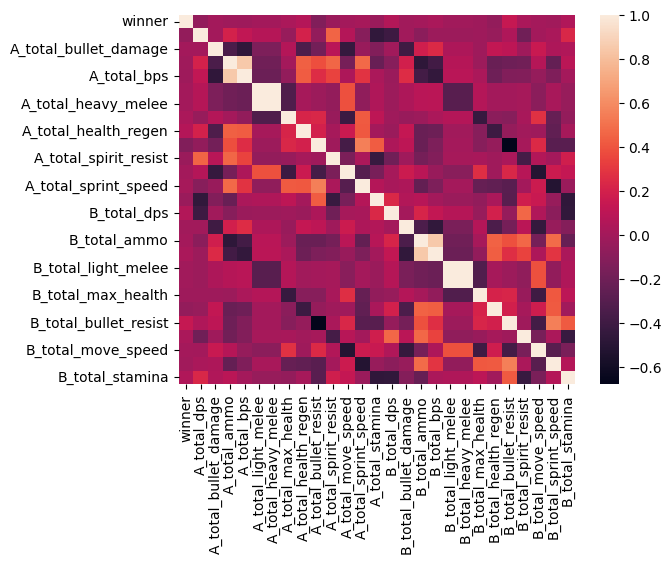

In [265]:
import seaborn as sns
to_corr = df[['winner'] + list(df.loc[:, 'A_total_dps':'B_total_stamina'].columns)]
sns.heatmap(to_corr.corr())

In [266]:
attr_col = ['A_total_dps',
       'A_total_bullet_damage', 'A_total_ammo', 'A_total_bps',
       'A_total_light_melee', 'A_total_heavy_melee', 'A_total_max_health',
       'A_total_health_regen', 'A_total_bullet_resist',
       'A_total_spirit_resist', 'A_total_move_speed', 'A_total_sprint_speed',
       'A_total_stamina', 'B_total_dps', 'B_total_bullet_damage',
       'B_total_ammo', 'B_total_bps', 'B_total_light_melee',
       'B_total_heavy_melee', 'B_total_max_health', 'B_total_health_regen',
       'B_total_bullet_resist', 'B_total_spirit_resist', 'B_total_move_speed',
       'B_total_sprint_speed', 'B_total_stamina']

In [267]:
df = df[['winner', 'A_synergy', 'B_synergy'] + heroes + attr_col]
df

,winner,A_synergy,B_synergy,abrams,bebop,dynamo,grey talon,haze,infernus,ivy,kelvin,lady geist,lash,mcginnis,mo & krill,paradox,pocket,seven,shiv,vindicta,viscous,warden,wraith,yamato,A_total_dps,A_total_bullet_damage,A_total_ammo,A_total_bps,A_total_light_melee,A_total_heavy_melee,A_total_max_health,A_total_health_regen,A_total_bullet_resist,A_total_spirit_resist,A_total_move_speed,A_total_sprint_speed,A_total_stamina,B_total_dps,B_total_bullet_damage,B_total_ammo,B_total_bps,B_total_light_melee,B_total_heavy_melee,B_total_max_health,B_total_health_regen,B_total_bullet_resist,B_total_spirit_resist,B_total_move_speed,B_total_sprint_speed,B_total_stamina
0,0.0,7.462451,7.528872,0.0,-1.0,0.0,1.0,-1.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,-1.0,0.0,388.0,58.55,251.0,54.44,378.0,696.0,3450.0,12.0,10.0,40.0,40.7,5.0,17.0,413.0,78.90,123.0,29.88,378.0,696.0,3375.0,11.5,-2.0,-15.0,40.5,0.0,17.0
1,1.0,7.521742,7.544659,1.0,-1.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,-1.0,-1.0,0.0,0.0,1.0,-1.0,418.0,58.25,152.0,36.16,384.0,708.0,3525.0,13.0,0.0,10.0,42.2,3.0,17.0,397.0,37.48,161.0,34.39,378.0,696.0,3500.0,11.5,8.0,-15.0,41.8,0.0,18.0
2,0.0,7.502697,7.527291,1.0,0.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,-1.0,0.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0,1.0,-1.0,0.0,0.0,409.0,83.00,108.0,32.22,378.0,696.0,3475.0,11.0,0.0,-5.0,40.0,1.0,18.0,384.0,47.58,141.0,36.93,378.0,696.0,3400.0,10.5,8.0,0.0,41.0,0.0,19.0
3,1.0,7.427387,7.489349,-1.0,1.0,-1.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,0.0,380.0,62.78,99.0,26.57,378.0,696.0,3450.0,11.0,0.0,0.0,41.0,0.0,18.0,414.0,65.45,252.0,49.98,378.0,696.0,3400.0,12.5,8.0,25.0,40.7,3.0,16.0
4,1.0,7.540967,7.550029,0.0,0.0,0.0,-1.0,1.0,1.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,0.0,-1.0,1.0,1.0,1.0,1.0,0.0,-1.0,0.0,409.0,61.60,148.0,39.46,378.0,696.0,3500.0,13.0,0.0,-5.0,41.3,0.0,19.0,395.0,57.40,133.0,38.28,378.0,696.0,3375.0,11.5,-2.0,0.0,43.5,0.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17859,1.0,7.525897,7.414575,0.0,1.0,0.0,0.0,-1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.0,1.0,0.0,-1.0,-1.0,1.0,1.0,-1.0,405.0,50.85,117.0,34.76,384.0,708.0,3275.0,12.0,-10.0,-15.0,44.5,0.0,17.0,416.0,70.30,219.0,45.66,378.0,696.0,3450.0,12.5,18.0,10.0,39.2,3.0,18.0
17860,1.0,7.454085,7.533155,1.0,-1.0,-1.0,0.0,1.0,0.0,1.0,-1.0,0.0,0.0,1.0,-1.0,1.0,0.0,0.0,0.0,1.0,-1.0,-1.0,0.0,0.0,426.0,76.70,156.0,35.06,378.0,696.0,3700.0,14.0,10.0,10.0,40.0,3.0,18.0,402.0,43.13,195.0,51.67,378.0,696.0,3300.0,11.0,-10.0,25.0,42.5,0.0,17.0
17861,0.0,7.433514,7.537301,0.0,-1.0,-1.0,1.0,-1.0,1.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,-1.0,1.0,1.0,-1.0,1.0,0.0,0.0,403.0,56.55,224.0,50.12,378.0,696.0,3450.0,12.5,18.0,25.0,41.2,3.0,17.0,388.0,93.10,106.0,25.88,378.0,696.0,3525.0,11.0,-10.0,0.0,39.5,1.0,17.0
17862,0.0,7.563039,7.441293,0.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,-1.0,-1.0,0.0,1.0,0.0,1.0,-1.0,1.0,389.0,39.50,210.0,51.72,378.0,696.0,3425.0,12.5,18.0,-15.0,41.7,3.0,18.0,442.0,75.20,150.0,32.04,384.0,708.0,3500.0,12.0,-10.0,25.0,42.3,1.0,16.0


In [268]:
df.isna().sum()

winner                   0
A_synergy                0
B_synergy                0
abrams                   0
bebop                    0
dynamo                   0
grey talon               0
haze                     0
infernus                 0
ivy                      0
kelvin                   0
lady geist               0
lash                     0
mcginnis                 0
mo & krill               0
paradox                  0
pocket                   0
seven                    0
shiv                     0
vindicta                 0
viscous                  0
warden                   0
wraith                   0
yamato                   0
A_total_dps              0
A_total_bullet_damage    0
A_total_ammo             0
A_total_bps              0
A_total_light_melee      0
A_total_heavy_melee      0
A_total_max_health       0
A_total_health_regen     0
A_total_bullet_resist    0
A_total_spirit_resist    0
A_total_move_speed       0
A_total_sprint_speed     0
A_total_stamina          0
B

In [269]:
df.duplicated().sum()

0

In [270]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [271]:
X, y = df.drop('winner', axis=1), df['winner']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)
X_train.shape, X_test.shape

((12504, 49), (5360, 49))

In [272]:
RFC = RandomForestClassifier(n_estimators=250, max_depth=25)
RFC.fit(X_train, y_train)

y_pred_train = RFC.predict(X_train)
y_pred_test = RFC.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'accuracy train: {accuracy_train}, accuracy test: {accuracy_test}')


accuracy train: 1.0, accuracy test: 0.5845149253731343


In [273]:
GBC = GradientBoostingClassifier(n_estimators=1500, max_depth=3)
GBC.fit(X_train, y_train)

y_pred_train = GBC.predict(X_train)
y_pred_test = GBC.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'accuracy train: {accuracy_train}, accuracy test: {accuracy_test}')

accuracy train: 0.86340371081254, accuracy test: 0.5634328358208955


In [274]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

y_pred_train = logreg.predict(X_train_scaled)
y_pred_test = logreg.predict(X_test_scaled)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f'accuracy train: {accuracy_train}, accuracy test: {accuracy_test}')

accuracy train: 0.6025271912987844, accuracy test: 0.5983208955223881


In [129]:
# df_example = pd.read_csv('picks_only.csv')
# df_example

,matchid,duration,winner,hero_1_A,hero_2_A,hero_3_A,hero_4_A,hero_5_A,hero_6_A,hero_1_B,hero_2_B,hero_3_B,hero_4_B,hero_5_B,hero_6_B
0,6300004,34:10,0,haze,mcginnis,lash,bebop,wraith,lady geist,seven,vindicta,grey talon,infernus,pocket,warden
1,6300005,15:24,1,yamato,kelvin,vindicta,infernus,shiv,bebop,seven,wraith,pocket,mo & krill,abrams,paradox
2,6300007,25:17,0,lady geist,kelvin,infernus,pocket,warden,haze,paradox,ivy,seven,viscous,abrams,shiv
3,6300008,20:29,1,warden,abrams,dynamo,haze,viscous,shiv,bebop,mcginnis,grey talon,vindicta,wraith,seven
4,6300009,29:35,1,ivy,kelvin,grey talon,mo & krill,pocket,wraith,viscous,shiv,vindicta,haze,seven,infernus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17859,6430057,24:01,1,viscous,pocket,haze,infernus,vindicta,yamato,bebop,paradox,wraith,kelvin,seven,warden
17860,6430059,18:16,1,dynamo,viscous,kelvin,warden,bebop,mo & krill,haze,paradox,mcginnis,ivy,vindicta,abrams
17861,6430060,26:55,0,dynamo,bebop,seven,haze,viscous,mcginnis,vindicta,infernus,warden,lady geist,shiv,grey talon
17862,6430061,44:21,0,pocket,infernus,wraith,haze,seven,bebop,lady geist,mo & krill,mcginnis,warden,yamato,vindicta


In [307]:
heroes_A = [input('enter amber heroes: ').lower() for _ in range(6)]
heroes_B = [input('enter sapphire heroes: ').lower() for _ in range(6)]

# kills_A = int(input('enter amber total kills: '))
# deaths_A = int(input('enter amber total deaths: '))
# assists_A = int(input('enter amber total assists: '))
# kills_B = int(input('enter sapphire total kills: '))
# deaths_B = int(input('enter sapphire total deaths: '))
# assists_B = int(input('enter sapphire total assists: '))
# souls_A = int(input('enter amber total souls: '))
# souls_B = int(input('enter sapphire total souls: '))

test_match = pd.DataFrame(df_example.iloc[0, :] * 0).T
test_match.drop('duration', axis=1, inplace=True)
test_match.drop('matchid', axis=1, inplace=True)

for i in range(1, 7):
    test_match[f'hero_{i}_A'] = heroes_A[i - 1]
for i in range(1, 7):
    test_match[f'hero_{i}_B'] = heroes_B[i - 1]

A_team = ['hero_1_A', 'hero_2_A', 'hero_3_A', 'hero_4_A', 'hero_5_A', 'hero_6_A']
B_team = ['hero_1_B', 'hero_2_B', 'hero_3_B', 'hero_4_B', 'hero_5_B', 'hero_6_B']

test_match['A'] = test_match[A_team].values.tolist()
test_match['B'] = test_match[B_team].values.tolist()
for ch in ('A', 'B'):
    for i in range(1, 7):
        test_match.drop(f'hero_{i}_{ch}', axis=1, inplace=True)

add_synergy(test_match, duo_winrate)

test_match[A_team] = test_match['A'].tolist()
test_match[B_team] = test_match['B'].tolist()
test_match.drop(['A', 'B'], axis=1, inplace=True)

for hero in heroes:
    test_match[hero] = 0
    test_match[f'{hero}'] -= (test_match[A_team] == f'{hero}').any(axis=1).astype(float)
    test_match[f'{hero}'] += (test_match[B_team] == f'{hero}').any(axis=1).astype(float)

for ch in ('A', 'B'):
    for i in range(1, 7):
        test_match.drop(f'hero_{i}_{ch}', axis=1, inplace=True)

heroes_stats = pd.read_csv('heroes_stats.csv')
for ch in ('A', 'B'):
    for col in heroes_stats.columns[1:]:
        test_match[f'{ch}_total_{col}'] = 0

add_heroes_attributes(test_match, heroes, heroes_stats) 
test_match.drop('winner', axis=1, inplace=True)
test_match = test_match.astype(float)

# test_match
# test_match['A_souls'] = souls_A
# test_match['B_souls'] = souls_B
# test_match['A_KDA'] = (kills_A + assists_A) / deaths_A
# test_match['B_KDA'] = (kills_B + assists_B) / deaths_B

C:\Users\adore\AppData\Local\Temp\ipykernel_15188\2466298685.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5012927319735708' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[cnt, 3] += (duo_winrate[i]['win'] / duo_winrate[i]['total'])
C:\Users\adore\AppData\Local\Temp\ipykernel_15188\2466298685.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5050568900126422' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[cnt, 4] += (duo_winrate[i[1], i[0]]['win'] / duo_winrate[i[1], i[0]]['total'])
C:\Users\adore\AppData\Local\Temp\ipykernel_15188\1364514115.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with int64

In [308]:
test_match

,A_synergy,B_synergy,abrams,bebop,dynamo,grey talon,haze,infernus,ivy,kelvin,lady geist,lash,mcginnis,mo & krill,paradox,pocket,seven,shiv,vindicta,viscous,warden,wraith,yamato,A_total_dps,A_total_bullet_damage,A_total_ammo,A_total_bps,A_total_light_melee,A_total_heavy_melee,A_total_max_health,A_total_health_regen,A_total_bullet_resist,A_total_spirit_resist,A_total_move_speed,A_total_sprint_speed,A_total_stamina,B_total_dps,B_total_bullet_damage,B_total_ammo,B_total_bps,B_total_light_melee,B_total_heavy_melee,B_total_max_health,B_total_health_regen,B_total_bullet_resist,B_total_spirit_resist,B_total_move_speed,B_total_sprint_speed,B_total_stamina
0,7.528086,7.554963,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1.0,-1.0,400.0,49.05,124.0,25.72,384.0,708.0,3300.0,11.5,-2.0,-15.0,43.5,0.0,17.0,373.0,72.4,193.0,44.1,378.0,696.0,3500.0,13.0,10.0,10.0,40.2,3.0,18.0


In [309]:
test_match_scaled = scaler.transform(test_match)
logreg.predict_proba(test_match_scaled) * 100

array([[52.5563869, 47.4436131]])

In [305]:
logreg.predict(test_match_scaled)

array([1.])